In [30]:
%load_ext autoreload

%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import os
import sys
sys.path.append('..')

from scripts.data_utils.loaders import *
from scripts.data_utils.cleaner import *
from scripts.utils.visualization import *
from scripts.data_utils.preprocess import *
from scripts.data_utils.feature_engineering import *

# import matplotlib
# matplotlib.use('TkAgg')

In [33]:
RESOURCEPATH = os.path.join('..', 'resources')
DATAPATH = os.path.join(RESOURCEPATH, 'data')
processed_output_dir = os.path.join(DATAPATH, 'processed')
raw_data_path = os.path.join(DATAPATH, 'raw')
plot_output_dir = os.path.join('..', 'screenshots', 'plots')
os.makedirs(plot_output_dir, exist_ok=True)

In [34]:
filename = 'data.csv'
file_path = os.path.join(raw_data_path, filename)
data_csv = load_data(file_path)
data_csv.shape

2025-01-28 04:27:50 - INFO - Loading data from ..\resources\data\raw\data.csv
2025-01-28 04:27:50 - INFO - Loading data from ..\resources\data\raw\data.csv
2025-01-28 04:27:50 - INFO - Loading data from ..\resources\data\raw\data.csv
2025-01-28 04:27:50 - INFO - Loading data from ..\resources\data\raw\data.csv
2025-01-28 04:27:50 - INFO - Loading data from ..\resources\data\raw\data.csv
2025-01-28 04:27:50 - INFO - Loading data from ..\resources\data\raw\data.csv
2025-01-28 04:27:50 - INFO - Loading data from ..\resources\data\raw\data.csv


2025-01-28 04:27:51 - INFO - Successfully loaded data from ..\resources\data\raw\data.csv
2025-01-28 04:27:51 - INFO - Successfully loaded data from ..\resources\data\raw\data.csv
2025-01-28 04:27:51 - INFO - Successfully loaded data from ..\resources\data\raw\data.csv
2025-01-28 04:27:51 - INFO - Successfully loaded data from ..\resources\data\raw\data.csv
2025-01-28 04:27:51 - INFO - Successfully loaded data from ..\resources\data\raw\data.csv
2025-01-28 04:27:51 - INFO - Successfully loaded data from ..\resources\data\raw\data.csv
2025-01-28 04:27:51 - INFO - Successfully loaded data from ..\resources\data\raw\data.csv


(95662, 16)

In [35]:
filename2 = 'data.xlsx'
file_path2 = os.path.join(raw_data_path, filename2)
data_xlsx = load_data(file_path2, sheet_name='data')
data_xlsx.shape

2025-01-28 04:27:52 - INFO - Loading data from ..\resources\data\raw\data.xlsx
2025-01-28 04:27:52 - INFO - Loading data from ..\resources\data\raw\data.xlsx
2025-01-28 04:27:52 - INFO - Loading data from ..\resources\data\raw\data.xlsx
2025-01-28 04:27:52 - INFO - Loading data from ..\resources\data\raw\data.xlsx
2025-01-28 04:27:52 - INFO - Loading data from ..\resources\data\raw\data.xlsx
2025-01-28 04:27:52 - INFO - Loading data from ..\resources\data\raw\data.xlsx
2025-01-28 04:27:52 - INFO - Loading data from ..\resources\data\raw\data.xlsx
2025-01-28 04:28:28 - INFO - Successfully loaded data from ..\resources\data\raw\data.xlsx
2025-01-28 04:28:28 - INFO - Successfully loaded data from ..\resources\data\raw\data.xlsx
2025-01-28 04:28:28 - INFO - Successfully loaded data from ..\resources\data\raw\data.xlsx
2025-01-28 04:28:28 - INFO - Successfully loaded data from ..\resources\data\raw\data.xlsx
2025-01-28 04:28:28 - INFO - Successfully loaded data from ..\resources\data\raw\da

(95662, 18)

In [36]:
data = data_xlsx.copy()

# Preprocessed

In [37]:
filename = "processed"
irrelevant_columns = ['Unnamed: 16', 'Unnamed: 17']
numerical_columns = ['Amount', 'Value', 'PricingStrategy']
categorical_columns = ["CurrencyCode", "ProductCategory", "ChannelId", "ProviderId"]
date_column = "TransactionStartTime"

missing_value_strategies = {
        "CountryCode": "most_frequent",
        "AccountId": "most_frequent",
        "ProviderId": "most_frequent",
        "PricingStrategy": "median",
        "Value": "mean",
}
dtype_conversions = {
        "CountryCode": "int64",
}

data = data_xlsx.copy()

data_preprocessed = preprocess_data(data, irrelevant_columns, categorical_columns, numerical_columns, 
                                    missing_value_strategies, date_column, dtype_conversions, filename, processed_output_dir)
data_preprocessed

2025-01-28 04:28:29 - INFO - Cleaning...
2025-01-28 04:28:29 - INFO - Cleaning...
2025-01-28 04:28:29 - INFO - Cleaning...
2025-01-28 04:28:29 - INFO - Cleaning...
2025-01-28 04:28:29 - INFO - Cleaning...
2025-01-28 04:28:29 - INFO - Cleaning...
2025-01-28 04:28:29 - INFO - Cleaning...
2025-01-28 04:28:29 - INFO - Dropped columns: {'Unnamed: 17', 'Unnamed: 16'}. Remaining columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']
2025-01-28 04:28:29 - INFO - Dropped columns: {'Unnamed: 17', 'Unnamed: 16'}. Remaining columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']
2025-01-28 04:28:29 - INFO - Dropped 

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,PROVIDERID_6,ProductId_10,AIRTIME,CHANNELID_3,1000.0,1000.00000,2018-11-15 02:18:49+00:00,2.0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,3679.0,20.00000,2018-11-15 02:19:08+00:00,2.0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,PROVIDERID_4,ProductId_1,AIRTIME,CHANNELID_3,500.0,500.00000,2018-11-15 02:44:21+00:00,2.0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,PROVIDERID_1,ProductId_21,UTILITY_BILL,CHANNELID_3,20000.0,9900.64041,2018-11-15 03:32:55+00:00,2.0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,-644.0,644.00000,2018-11-15 03:34:21+00:00,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95656,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,-1000.0,1000.00000,2019-02-13 09:54:09+00:00,2.0,0
95657,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,PROVIDERID_6,ProductId_10,AIRTIME,CHANNELID_3,1000.0,1000.00000,2019-02-13 09:54:25+00:00,2.0,0
95658,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,-20.0,20.00000,2019-02-13 09:54:35+00:00,2.0,0
95659,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,PROVIDERID_6,ProductId_19,TV,CHANNELID_3,3000.0,3000.00000,2019-02-13 10:01:10+00:00,2.0,0


# Feature Engineerign

In [38]:
feature_output_dir = os.path.join(DATAPATH, 'features')
os.makedirs(feature_output_dir, exist_ok=True)

aggregated_features_path = os.path.join(feature_output_dir, "aggregate_features.csv")
temporal_features_path = os.path.join(feature_output_dir, "temporal_features.csv")
encoded_features_path = os.path.join(feature_output_dir, "encoded_features.csv")
missing_handled_path = os.path.join(feature_output_dir, "missing_handled.csv")
normalized_features_path = os.path.join(feature_output_dir, "normalized_features.csv")
data = data_preprocessed.copy()

In [39]:
# Aggregate Features
data_aggregated = create_aggregate_features(data, output_path=aggregated_features_path)
data = data_aggregated

2025-01-28 04:28:33 - INFO - Creating aggregate features.
2025-01-28 04:28:33 - INFO - Creating aggregate features.
2025-01-28 04:28:33 - INFO - Creating aggregate features.
2025-01-28 04:28:33 - INFO - Creating aggregate features.
2025-01-28 04:28:33 - INFO - Creating aggregate features.
2025-01-28 04:28:33 - INFO - Creating aggregate features.
2025-01-28 04:28:33 - INFO - Creating aggregate features.
2025-01-28 04:28:33 - INFO - Aggregate features created successfully.
2025-01-28 04:28:33 - INFO - Aggregate features created successfully.
2025-01-28 04:28:33 - INFO - Aggregate features created successfully.
2025-01-28 04:28:33 - INFO - Aggregate features created successfully.
2025-01-28 04:28:33 - INFO - Aggregate features created successfully.
2025-01-28 04:28:33 - INFO - Aggregate features created successfully.
2025-01-28 04:28:33 - INFO - Aggregate features created successfully.
2025-01-28 04:28:33 - INFO - Aggregate features saved to ..\resources\data\features\aggregate_features.c

In [40]:
# Temporal Features
date_column = 'TransactionStartTime'
data_temporal = extract_temporal_features(data, date_column, output_path=temporal_features_path)
data =data_temporal

2025-01-28 04:28:34 - INFO - Extracting datetime features.
2025-01-28 04:28:34 - INFO - Extracting datetime features.
2025-01-28 04:28:34 - INFO - Extracting datetime features.
2025-01-28 04:28:34 - INFO - Extracting datetime features.
2025-01-28 04:28:34 - INFO - Extracting datetime features.
2025-01-28 04:28:34 - INFO - Extracting datetime features.
2025-01-28 04:28:34 - INFO - Extracting datetime features.
2025-01-28 04:28:34 - INFO - Temporal features extracted.
2025-01-28 04:28:34 - INFO - Temporal features extracted.
2025-01-28 04:28:34 - INFO - Temporal features extracted.
2025-01-28 04:28:34 - INFO - Temporal features extracted.
2025-01-28 04:28:34 - INFO - Temporal features extracted.
2025-01-28 04:28:34 - INFO - Temporal features extracted.
2025-01-28 04:28:34 - INFO - Temporal features extracted.
2025-01-28 04:28:37 - INFO - Datetime features saved to ..\resources\data\features\temporal_features.csv
2025-01-28 04:28:37 - INFO - Datetime features saved to ..\resources\data\fe

In [41]:
# Encode Categorical Variables
# Specify columns for one-hot and label encoding
one_hot_columns = ["ProductCategory", "ChannelId"]
label_columns = ["CurrencyCode", "CountryCode"] #, "ProviderId"]
data_encoded, encoder_map = encode_categorical_variables(data, one_hot_columns, label_columns, output_path=encoded_features_path)
data = data_encoded

2025-01-28 04:28:37 - INFO - Performing One-Hot Encoding.
2025-01-28 04:28:37 - INFO - Performing One-Hot Encoding.
2025-01-28 04:28:37 - INFO - Performing One-Hot Encoding.
2025-01-28 04:28:37 - INFO - Performing One-Hot Encoding.
2025-01-28 04:28:37 - INFO - Performing One-Hot Encoding.
2025-01-28 04:28:37 - INFO - Performing One-Hot Encoding.
2025-01-28 04:28:37 - INFO - Performing One-Hot Encoding.
2025-01-28 04:28:37 - INFO - Performing Label Encoding.
2025-01-28 04:28:37 - INFO - Performing Label Encoding.
2025-01-28 04:28:37 - INFO - Performing Label Encoding.
2025-01-28 04:28:37 - INFO - Performing Label Encoding.
2025-01-28 04:28:37 - INFO - Performing Label Encoding.
2025-01-28 04:28:37 - INFO - Performing Label Encoding.
2025-01-28 04:28:37 - INFO - Performing Label Encoding.
2025-01-28 04:28:41 - INFO - Encoded features saved to ..\resources\data\features\encoded_features.csv
2025-01-28 04:28:41 - INFO - Encoded features saved to ..\resources\data\features\encoded_features.

In [42]:
encoder_map

{'CurrencyCode': ['UGX'], 'CountryCode': ['256']}

In [43]:
# Normalize Numerical Features
numerical_features = ['total_transaction_amount', 'avg_transaction_amount', 'std_transaction_amount', 'transaction_count']
numerical_columns = ['Amount', 'Value', 'PricingStrategy'] + numerical_features
data_scaled = normalize_or_standardize(data, numerical_columns, mode='standard', output_path=normalized_features_path) # mode="normalize"
data = data_scaled

2025-01-28 04:28:42 - INFO - Scaling numerical features using standard method.
2025-01-28 04:28:42 - INFO - Scaling numerical features using standard method.
2025-01-28 04:28:42 - INFO - Scaling numerical features using standard method.
2025-01-28 04:28:42 - INFO - Scaling numerical features using standard method.
2025-01-28 04:28:42 - INFO - Scaling numerical features using standard method.
2025-01-28 04:28:42 - INFO - Scaling numerical features using standard method.
2025-01-28 04:28:42 - INFO - Scaling numerical features using standard method.
2025-01-28 04:28:42 - INFO - Numerical features scaled using standard mode.
2025-01-28 04:28:42 - INFO - Numerical features scaled using standard mode.
2025-01-28 04:28:42 - INFO - Numerical features scaled using standard mode.
2025-01-28 04:28:42 - INFO - Numerical features scaled using standard mode.
2025-01-28 04:28:42 - INFO - Numerical features scaled using standard mode.
2025-01-28 04:28:42 - INFO - Numerical features scaled using standa

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95661 entries, 0 to 95660
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   TransactionId                       95661 non-null  object             
 1   BatchId                             95661 non-null  object             
 2   AccountId                           95661 non-null  object             
 3   SubscriptionId                      95661 non-null  object             
 4   CustomerId                          95661 non-null  object             
 5   CurrencyCode                        95661 non-null  int32              
 6   CountryCode                         95661 non-null  int32              
 7   ProviderId                          95661 non-null  object             
 8   ProductId                           95661 non-null  object             
 9   Amount                              956

# WOE Binning

In [45]:
from scripts.data_utils.woe_binning import *
woe_output_path = os.path.join(feature_output_dir, "woe_encoded")
os.makedirs(woe_output_path, exist_ok=True)

# Define the target column and feature lists
target_column = "FraudResult"
numerical_features = ['Amount', 'Value', 'PricingStrategy']
categorical_features = ['ProductCategory', 'CurrencyCode', 'ChannelId', 'ChannelId', 'CountryCode']

data = data_preprocessed.copy()

In [46]:
# Calculate the default rate
default_rate_output = os.path.join(woe_output_path, 'default_rate.txt')
default_rate = calculate_default_rate(data, target=target_column)
default_rate

2025-01-28 04:28:48 - INFO - Default rate for target (FraudResult): 0.0020175411087067874
2025-01-28 04:28:48 - INFO - Default rate for target (FraudResult): 0.0020175411087067874
2025-01-28 04:28:48 - INFO - Default rate for target (FraudResult): 0.0020175411087067874
2025-01-28 04:28:48 - INFO - Default rate for target (FraudResult): 0.0020175411087067874
2025-01-28 04:28:48 - INFO - Default rate for target (FraudResult): 0.0020175411087067874
2025-01-28 04:28:48 - INFO - Default rate for target (FraudResult): 0.0020175411087067874
2025-01-28 04:28:48 - INFO - Default rate for target (FraudResult): 0.0020175411087067874


0.0020175411087067874

In [47]:
# Apply WoE encoding for categorical features
output_dir = os.path.join(woe_output_path, 'woe_categorical')
data = woe_encode_categorical(data, categorical_features, target=target_column, output_dir=output_dir)
data

2025-01-28 04:28:48 - INFO - Starting WoE encoding for categorical features.
2025-01-28 04:28:48 - INFO - Starting WoE encoding for categorical features.
2025-01-28 04:28:48 - INFO - Starting WoE encoding for categorical features.
2025-01-28 04:28:48 - INFO - Starting WoE encoding for categorical features.
2025-01-28 04:28:48 - INFO - Starting WoE encoding for categorical features.
2025-01-28 04:28:48 - INFO - Starting WoE encoding for categorical features.
2025-01-28 04:28:48 - INFO - Starting WoE encoding for categorical features.
2025-01-28 04:28:48 - INFO - Calculating WoE and IV for feature: ProductCategory
2025-01-28 04:28:48 - INFO - Calculating WoE and IV for feature: ProductCategory
2025-01-28 04:28:48 - INFO - Calculating WoE and IV for feature: ProductCategory
2025-01-28 04:28:48 - INFO - Calculating WoE and IV for feature: ProductCategory
2025-01-28 04:28:48 - INFO - Calculating WoE and IV for feature: ProductCategory
2025-01-28 04:28:48 - INFO - Calculating WoE and IV for 

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,ProductCategory_WoE,CurrencyCode_WoE,ChannelId_WoE,CountryCode_WoE
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,PROVIDERID_6,ProductId_10,AIRTIME,CHANNELID_3,1000.0,1000.00000,2018-11-15 02:18:49+00:00,2.0,0,1.620390,5.170753e-12,-0.472363,5.170753e-12
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,3679.0,20.00000,2018-11-15 02:19:08+00:00,2.0,0,-0.565457,5.170753e-12,2.709021,5.170753e-12
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,PROVIDERID_4,ProductId_1,AIRTIME,CHANNELID_3,500.0,500.00000,2018-11-15 02:44:21+00:00,2.0,0,1.620390,5.170753e-12,-0.472363,5.170753e-12
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,PROVIDERID_1,ProductId_21,UTILITY_BILL,CHANNELID_3,20000.0,9900.64041,2018-11-15 03:32:55+00:00,2.0,0,-1.134952,5.170753e-12,-0.472363,5.170753e-12
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,-644.0,644.00000,2018-11-15 03:34:21+00:00,2.0,0,-0.565457,5.170753e-12,2.709021,5.170753e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95656,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,-1000.0,1000.00000,2019-02-13 09:54:09+00:00,2.0,0,-0.565457,5.170753e-12,2.709021,5.170753e-12
95657,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,PROVIDERID_6,ProductId_10,AIRTIME,CHANNELID_3,1000.0,1000.00000,2019-02-13 09:54:25+00:00,2.0,0,1.620390,5.170753e-12,-0.472363,5.170753e-12
95658,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,PROVIDERID_4,ProductId_6,FINANCIAL_SERVICES,CHANNELID_2,-20.0,20.00000,2019-02-13 09:54:35+00:00,2.0,0,-0.565457,5.170753e-12,2.709021,5.170753e-12
95659,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,PROVIDERID_6,ProductId_19,TV,CHANNELID_3,3000.0,3000.00000,2019-02-13 10:01:10+00:00,2.0,0,16.410553,5.170753e-12,-0.472363,5.170753e-12


In [48]:
# Apply Numerical Feature Binning and WoE calculation for numerical features
for feature in numerical_features:
    output_path = os.path.join(woe_output_path, f"{feature}_binned_woe.csv")
    woe_binning_result = bin_numerical_feature(data, feature, target=target_column, max_bins=5, output_path=output_path)
    apply_woe_encoding(data, woe_binning_result, feature=feature, output_path=output_path)

2025-01-28 04:29:05 - INFO - Binning numerical feature: Amount with max bins: 5
2025-01-28 04:29:05 - INFO - Binning numerical feature: Amount with max bins: 5
2025-01-28 04:29:05 - INFO - Binning numerical feature: Amount with max bins: 5
2025-01-28 04:29:05 - INFO - Binning numerical feature: Amount with max bins: 5
2025-01-28 04:29:05 - INFO - Binning numerical feature: Amount with max bins: 5
2025-01-28 04:29:05 - INFO - Binning numerical feature: Amount with max bins: 5
2025-01-28 04:29:05 - INFO - Binning numerical feature: Amount with max bins: 5
2025-01-28 04:29:05 - INFO - Calculating WoE and IV for feature: Amount_Binned
2025-01-28 04:29:05 - INFO - Calculating WoE and IV for feature: Amount_Binned
2025-01-28 04:29:05 - INFO - Calculating WoE and IV for feature: Amount_Binned
2025-01-28 04:29:05 - INFO - Calculating WoE and IV for feature: Amount_Binned
2025-01-28 04:29:05 - INFO - Calculating WoE and IV for feature: Amount_Binned
2025-01-28 04:29:05 - INFO - Calculating WoE 

In [49]:
# Save the final transformed dataset
save_data(data, os.path.join(woe_output_path, 'transformed_data.csv'))

2025-01-28 04:29:21 - INFO - Data saved to ..\resources\data\features\woe_encoded\transformed_data.csv
2025-01-28 04:29:21 - INFO - Data saved to ..\resources\data\features\woe_encoded\transformed_data.csv
2025-01-28 04:29:21 - INFO - Data saved to ..\resources\data\features\woe_encoded\transformed_data.csv
2025-01-28 04:29:21 - INFO - Data saved to ..\resources\data\features\woe_encoded\transformed_data.csv
2025-01-28 04:29:21 - INFO - Data saved to ..\resources\data\features\woe_encoded\transformed_data.csv
2025-01-28 04:29:21 - INFO - Data saved to ..\resources\data\features\woe_encoded\transformed_data.csv
2025-01-28 04:29:21 - INFO - Data saved to ..\resources\data\features\woe_encoded\transformed_data.csv


In [50]:
# Apply WoE Encoding for Categorical Features
# data_xverse = woe_encode(data_preprocessed, target="FraudResult", categorical_columns=categorical_columns)
# data_xverse

Threshold

In [80]:
from scripts.data_utils.rfms_woe_binning import woe_pipeline
# Define column names and thresholds
data = data_preprocessed.copy()
customer_id_col = 'CustomerId'
transaction_date_col = 'TransactionStartTime'
amount_col = 'Amount'
recency_threshold = 30
frequency_threshold = 5
monetary_threshold = 1000.0
stability_threshold = 500.0

results = woe_pipeline(data, customer_id_col, transaction_date_col, amount_col, 
                      recency_threshold, frequency_threshold, monetary_threshold, stability_threshold)

# Access results
rfms_scores = results['RFMS']
woe_results = results['WoE_Results']

# Print WoE tables and IV values
for feature, result in woe_results.items():
    print(f"WoE Table for {feature}:")
    print(result['WoE_Table'])
    print(f"IV Value for {feature}: {result['IV']}")
    print("\n")

WoE Table for Recency:
   Recency_binned  Total  Good  Bad  Good%      Bad%        WoE        IV
0             0.0    149     0  149    0.0  0.039818 -17.499837  0.696813
1             1.0    521     0  521    0.0  0.139230 -18.751640  2.610798
2             2.0    422     0  422    0.0  0.112774 -18.540896  2.090929
3             3.0    374     0  374    0.0  0.099947 -18.420146  1.841030
4             4.0    399     0  399    0.0  0.106627 -18.484852  1.970993
5             5.0    339     0  339    0.0  0.090593 -18.321890  1.659840
6             6.0    363     0  363    0.0  0.097007 -18.390293  1.783986
7             7.0    406     0  406    0.0  0.108498 -18.502243  2.007459
8             8.0    383     0  383    0.0  0.102352 -18.443925  1.887767
9             9.0    386     0  386    0.0  0.103153 -18.451728  1.903358
IV Value for Recency: 18.452973600652914


WoE Table for Frequency:
   Frequency_binned  Total  Good  Bad  Good%      Bad%        WoE        IV
0               0.0

c:\Users\Darkles\10academy\env\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\Darkles\10academy\env\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


# WOE RFMS

In [51]:
from scripts.data_utils.woe_rfms import *
rfms_output_path = os.path.join(DATAPATH, "rfms_woe")

customer_column = "CustomerId"
recency_column = date_column
frequency_column = date_column
monetary_column = "Amount"
severity_column = "Value"
target_column = "FraudResult"
feature_columns = categorical_columns
data = data_preprocessed.copy()
# rfms_classified, woe_encoded = woe_rfms_pipeline(data, customer_column, recency_column, frequency_column, monetary_column,
#                                                  severity_column, target_column, feature_columns, rfms_output_path)

In [52]:
default_rate = calculate_default_rate(data, target_column)
f"{default_rate*100:.2f}%"

2025-01-28 04:29:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-28 04:29:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-28 04:29:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-28 04:29:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-28 04:29:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-28 04:29:22 - INFO - Default rate for target (FraudResult): 0.20%
2025-01-28 04:29:22 - INFO - Default rate for target (FraudResult): 0.20%


'0.20%'

2025-01-28 04:29:22 - INFO - Calculating RFMS scores with recency in seconds.
2025-01-28 04:29:22 - INFO - Calculating RFMS scores with recency in seconds.
2025-01-28 04:29:22 - INFO - Calculating RFMS scores with recency in seconds.
2025-01-28 04:29:22 - INFO - Calculating RFMS scores with recency in seconds.
2025-01-28 04:29:22 - INFO - Calculating RFMS scores with recency in seconds.
2025-01-28 04:29:22 - INFO - Calculating RFMS scores with recency in seconds.
2025-01-28 04:29:22 - INFO - Calculating RFMS scores with recency in seconds.


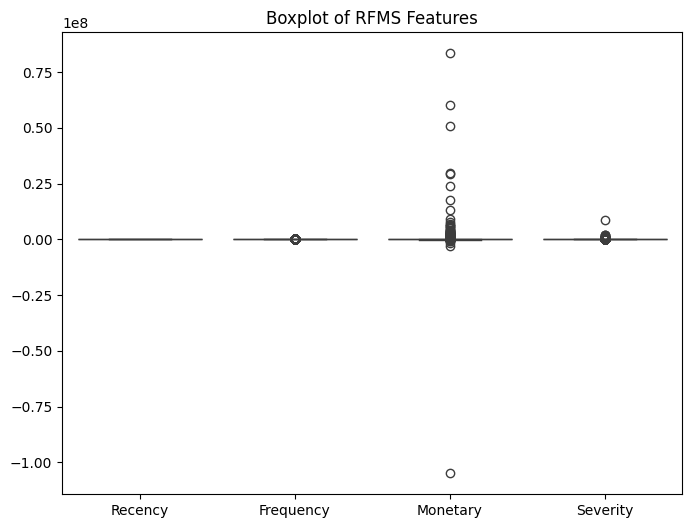

In [53]:
# Calculate RFMS scores
columns = ['Recency', 'Frequency', 'Monetary', 'Severity']
rfms = calculate_rfms(data, customer_column, recency_column, frequency_column, monetary_column, severity_column)
plot_box(rfms, columns)

2025-01-28 04:29:23 - INFO - Normalizing RFMS values.
2025-01-28 04:29:23 - INFO - Normalizing RFMS values.
2025-01-28 04:29:23 - INFO - Normalizing RFMS values.
2025-01-28 04:29:23 - INFO - Normalizing RFMS values.
2025-01-28 04:29:23 - INFO - Normalizing RFMS values.
2025-01-28 04:29:23 - INFO - Normalizing RFMS values.
2025-01-28 04:29:23 - INFO - Normalizing RFMS values.
2025-01-28 04:29:23 - INFO - RFMS normalization completed.
2025-01-28 04:29:23 - INFO - RFMS normalization completed.
2025-01-28 04:29:23 - INFO - RFMS normalization completed.
2025-01-28 04:29:23 - INFO - RFMS normalization completed.
2025-01-28 04:29:23 - INFO - RFMS normalization completed.
2025-01-28 04:29:23 - INFO - RFMS normalization completed.
2025-01-28 04:29:23 - INFO - RFMS normalization completed.


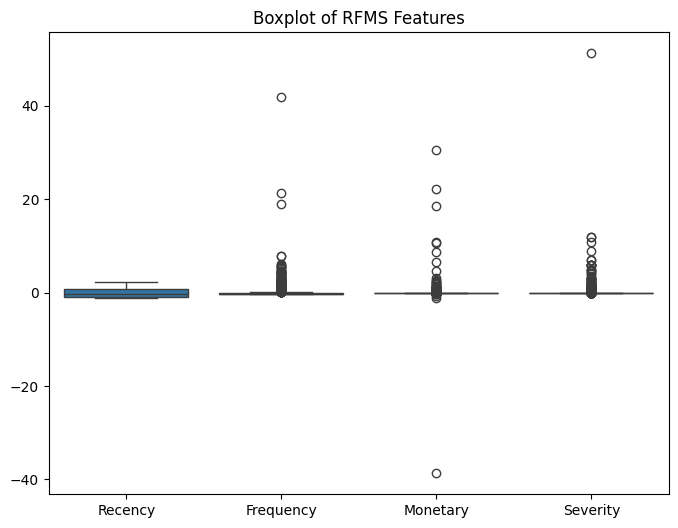

In [54]:
rfms_normalized = normalize_rfms(rfms, customer_column)
plot_box(rfms_normalized, columns)

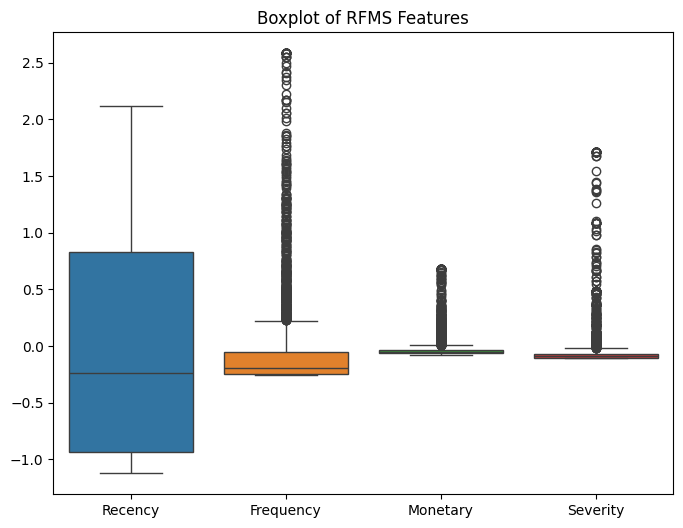

In [55]:
rfms_normalized_2 = handle_outliers(rfms_normalized, columns)
plot_box(rfms_normalized_2, columns)

2025-01-28 04:29:28 - INFO - Optimal k determined: 2 with silhouette score: 0.5758236493730957
2025-01-28 04:29:28 - INFO - Optimal k determined: 2 with silhouette score: 0.5758236493730957
2025-01-28 04:29:28 - INFO - Optimal k determined: 2 with silhouette score: 0.5758236493730957
2025-01-28 04:29:28 - INFO - Optimal k determined: 2 with silhouette score: 0.5758236493730957
2025-01-28 04:29:28 - INFO - Optimal k determined: 2 with silhouette score: 0.5758236493730957
2025-01-28 04:29:28 - INFO - Optimal k determined: 2 with silhouette score: 0.5758236493730957
2025-01-28 04:29:28 - INFO - Optimal k determined: 2 with silhouette score: 0.5758236493730957


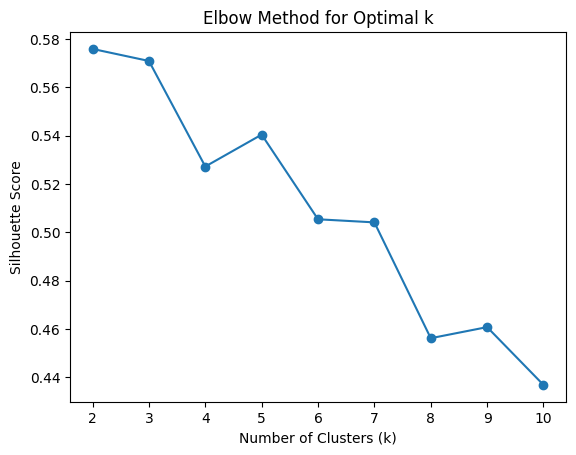

2025-01-28 04:29:29 - INFO - Classifying customers using kmeans method.
2025-01-28 04:29:29 - INFO - Classifying customers using kmeans method.
2025-01-28 04:29:29 - INFO - Classifying customers using kmeans method.
2025-01-28 04:29:29 - INFO - Classifying customers using kmeans method.
2025-01-28 04:29:29 - INFO - Classifying customers using kmeans method.
2025-01-28 04:29:29 - INFO - Classifying customers using kmeans method.
2025-01-28 04:29:29 - INFO - Classifying customers using kmeans method.
2025-01-28 04:29:29 - INFO - Clustering RFMS data into 2 clusters.
2025-01-28 04:29:29 - INFO - Clustering RFMS data into 2 clusters.
2025-01-28 04:29:29 - INFO - Clustering RFMS data into 2 clusters.
2025-01-28 04:29:29 - INFO - Clustering RFMS data into 2 clusters.
2025-01-28 04:29:29 - INFO - Clustering RFMS data into 2 clusters.
2025-01-28 04:29:29 - INFO - Clustering RFMS data into 2 clusters.
2025-01-28 04:29:29 - INFO - Clustering RFMS data into 2 clusters.


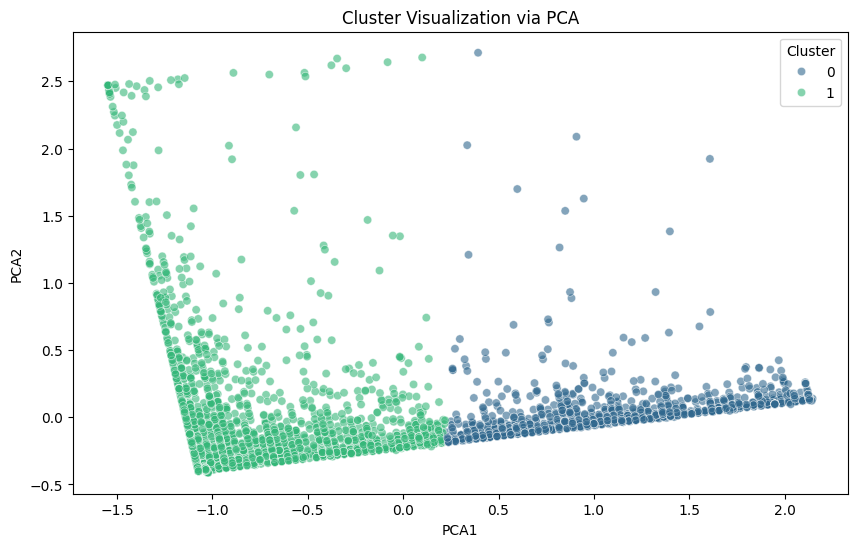

2025-01-28 04:29:29 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-28 04:29:29 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-28 04:29:29 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-28 04:29:29 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-28 04:29:29 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-28 04:29:29 - INFO - Customer labels assigned to column: RFMS_Label.
2025-01-28 04:29:29 - INFO - Customer labels assigned to column: RFMS_Label.


,CustomerId,Frequency,Monetary,Recency,Severity,Cluster,RFMS_Label
0,CustomerId_1,-0.253457,-0.066893,1.937605,-0.052310,0,Bad
1,CustomerId_10,-0.253457,-0.066893,1.937605,-0.052310,0,Bad
2,CustomerId_1001,-0.212184,-0.055851,2.122002,-0.075722,0,Bad
3,CustomerId_1002,-0.150275,-0.061657,-0.201408,-0.109443,1,Good
4,CustomerId_1003,-0.201866,-0.055851,-0.717722,-0.080182,1,Good
...,...,...,...,...,...,...,...
3737,CustomerId_992,-0.201866,-0.055851,-0.975879,-0.080182,1,Good
3738,CustomerId_993,-0.212184,-0.055851,-0.201408,-0.073811,1,Good
3739,CustomerId_994,0.778360,0.136966,-1.123397,-0.075723,1,Good
3740,CustomerId_996,-0.088366,-0.012052,1.347532,-0.058985,0,Bad


In [56]:
optimal_k = search_optimal_k(rfms_normalized[columns])
rfms_classified = classify_users(rfms_normalized_2, "Recency", "Frequency", "Monetary", "Severity", score_column="Monetary", 
                                 label_column="RFMS_Label", scoring_method="kmeans", num_clusters=optimal_k)
rfms_classified

In [57]:
cluster_summary(rfms_classified, customer_column)

Recency           Frequency            Monetary            \
                     mean    median      mean       sum      mean       sum   
CustomerId                                                                    
CustomerId_1     1.937605  1.937605 -0.253457 -0.253457 -0.066893 -0.066893   
CustomerId_10    1.937605  1.937605 -0.253457 -0.253457 -0.066893 -0.066893   
CustomerId_1001  2.122002  2.122002 -0.212184 -0.212184 -0.055851 -0.055851   
CustomerId_1002 -0.201408 -0.201408 -0.150275 -0.150275 -0.061657 -0.061657   
CustomerId_1003 -0.717722 -0.717722 -0.201866 -0.201866 -0.055851 -0.055851   
...                   ...       ...       ...       ...       ...       ...   
CustomerId_992  -0.975879 -0.975879 -0.201866 -0.201866 -0.055851 -0.055851   
CustomerId_993  -0.201408 -0.201408 -0.212184 -0.212184 -0.055851 -0.055851   
CustomerId_994  -1.123397 -1.123397  0.778360  0.778360  0.136966  0.136966   
CustomerId_996   1.347532  1.347532 -0.088366 -0.088366 -0.012052 -0.012052   
CustomerId_998  -1.123397 -1.123397 -0.036775 -0.036775 -0.026406 -0.026406   

                 Severity  
                     mean  
CustomerId                 
CustomerId_1    -0.052310  
CustomerId_10   -0.052310  
CustomerId_1001 -0.075722  
CustomerId_1002 -0.109443  
CustomerId_1003 -0.080182  
...                   ...  
CustomerId_992  -0.080182  
CustomerId_993  -0.073811  
CustomerId_994  -0.075723  
CustomerId_996  -0.058985  
CustomerId_998  -0.067784  

[3742 rows x 7 columns]

2025-01-28 04:29:30 - INFO - Generating cluster visualization.
2025-01-28 04:29:30 - INFO - Generating cluster visualization.
2025-01-28 04:29:30 - INFO - Generating cluster visualization.
2025-01-28 04:29:30 - INFO - Generating cluster visualization.
2025-01-28 04:29:30 - INFO - Generating cluster visualization.
2025-01-28 04:29:30 - INFO - Generating cluster visualization.
2025-01-28 04:29:30 - INFO - Generating cluster visualization.
2025-01-28 04:29:30 - INFO - Cluster visualization saved to ..\resources\data\rfms_scores.csv\clusters.png.
2025-01-28 04:29:30 - INFO - Cluster visualization saved to ..\resources\data\rfms_scores.csv\clusters.png.
2025-01-28 04:29:30 - INFO - Cluster visualization saved to ..\resources\data\rfms_scores.csv\clusters.png.
2025-01-28 04:29:30 - INFO - Cluster visualization saved to ..\resources\data\rfms_scores.csv\clusters.png.
2025-01-28 04:29:30 - INFO - Cluster visualization saved to ..\resources\data\rfms_scores.csv\clusters.png.
2025-01-28 04:29:30

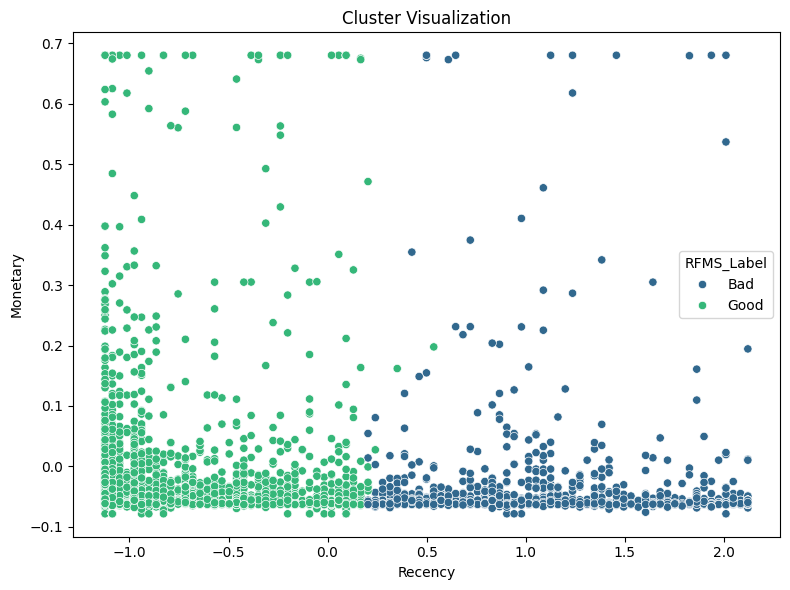

In [58]:
visualize_clusters(rfms_classified, "Recency", "Monetary", "RFMS_Label", output_dir=rfms_output_path)

In [59]:
woe_encoded_features = woe_binning(data, target_column, feature_columns, max_bins=5, output_dir=rfms_output_path)
woe_encoded_features

2025-01-28 04:29:31 - INFO - Applying WoE binning.
2025-01-28 04:29:31 - INFO - Applying WoE binning.
2025-01-28 04:29:31 - INFO - Applying WoE binning.
2025-01-28 04:29:31 - INFO - Applying WoE binning.
2025-01-28 04:29:31 - INFO - Applying WoE binning.
2025-01-28 04:29:31 - INFO - Applying WoE binning.
2025-01-28 04:29:31 - INFO - Applying WoE binning.
2025-01-28 04:29:31 - INFO - Binning CurrencyCode and calculating WoE/IV.
2025-01-28 04:29:31 - INFO - Binning CurrencyCode and calculating WoE/IV.
2025-01-28 04:29:31 - INFO - Binning CurrencyCode and calculating WoE/IV.
2025-01-28 04:29:31 - INFO - Binning CurrencyCode and calculating WoE/IV.
2025-01-28 04:29:31 - INFO - Binning CurrencyCode and calculating WoE/IV.
2025-01-28 04:29:31 - INFO - Binning CurrencyCode and calculating WoE/IV.
2025-01-28 04:29:31 - INFO - Binning CurrencyCode and calculating WoE/IV.
2025-01-28 04:29:31 - INFO - WoE binning and IV calculation completed for CurrencyCode.
2025-01-28 04:29:31 - INFO - WoE binn

,CurrencyCode,ProductCategory,ChannelId,ProviderId,CurrencyCode_WoE,ProductCategory_WoE,ChannelId_WoE,ProviderId_WoE
0,UGX,AIRTIME,CHANNELID_3,PROVIDERID_6,5.170753e-12,1.620390,-0.472363,3.136986
1,UGX,FINANCIAL_SERVICES,CHANNELID_2,PROVIDERID_4,5.170753e-12,-0.565457,2.709021,2.736904
2,UGX,AIRTIME,CHANNELID_3,PROVIDERID_4,5.170753e-12,1.620390,-0.472363,2.736904
3,UGX,UTILITY_BILL,CHANNELID_3,PROVIDERID_1,5.170753e-12,-1.134952,-0.472363,-1.618889
4,UGX,FINANCIAL_SERVICES,CHANNELID_2,PROVIDERID_4,5.170753e-12,-0.565457,2.709021,2.736904
...,...,...,...,...,...,...,...,...
95656,UGX,FINANCIAL_SERVICES,CHANNELID_2,PROVIDERID_4,5.170753e-12,-0.565457,2.709021,2.736904
95657,UGX,AIRTIME,CHANNELID_3,PROVIDERID_6,5.170753e-12,1.620390,-0.472363,3.136986
95658,UGX,FINANCIAL_SERVICES,CHANNELID_2,PROVIDERID_4,5.170753e-12,-0.565457,2.709021,2.736904
95659,UGX,TV,CHANNELID_3,PROVIDERID_6,5.170753e-12,16.410553,-0.472363,3.136986
